# Ques 1. 
Part 1: Import the csv file which contains bollinger trends too from module 2.

In [1]:
#importing necessary libraries : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Visualisation_module.csv')
df.head()

,Date,Date.1,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Day_Perc_Change,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,2017-05-16,2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,...,0.019788,Positive,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
1,2017-05-17,2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,...,-0.006350,Slight,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
2,2017-05-18,2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,...,-0.013314,Negative,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
3,2017-05-19,2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,...,0.029867,Positive,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
4,2017-05-22,2017-05-22,ITC,EQ,286.20,292.45,304.80,291.30,303.00,303.60,...,0.060797,Top gainers,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN


In [3]:
df = df.drop('Date.1', axis = 1)
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Day_Perc_Change,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,...,0.019788,Positive,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
1,2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,...,-0.006350,Slight,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
2,2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,...,-0.013314,Negative,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
3,2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,...,0.029867,Positive,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN
4,2017-05-22,ITC,EQ,286.20,292.45,304.80,291.30,303.00,303.60,299.75,...,0.060797,Top gainers,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN


Part 2: Create a new column 'CALL':
        
        'Buy' if the stock price is below bollinger lower band
        
        'Hold Buy/Liquidate Short' if the stock price is between the lower and middle bollinger band
        
        'Hold Short/Liquidate Buy' if the stock price is between the middle and upper bollinger band
        
        'Short' if the stock price is above the upper bollinger band

In [4]:
def call(row):
    if row['Close Price']<row['14_day_bollinger_lower']: return 'Buy'
    if row['Close Price']>row['14_day_bollinger_upper']: return 'Short'
    if row['Close Price']>row['14_day_SMA']: return 'Hold Buy/Liquidate Short'
    if row['Close Price']<row['14_day_SMA']: return 'Hold Short/Liquidate Buy'
    if row['Close Price']==row['14_day_bollinger_upper']: return 'Hold'
df['Call'] = df.apply(call,axis = 1)
df

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Trend,Volatility,SMA_21,LMA_34,Trade_Call,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call
0,2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,...,Positive,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN,None
1,2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,...,Slight,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN,None
2,2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,...,Negative,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN,None
3,2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,...,Positive,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN,None
4,2017-05-22,ITC,EQ,286.20,292.45,304.80,291.30,303.00,303.60,299.75,...,Top gainers,NaN,NaN,NaN,HOLD,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,2019-05-07,ITC,EQ,307.00,308.25,309.50,300.85,302.45,301.90,305.31,...,Negative,0.027503,301.350000,299.379412,HOLD,304.478571,1.871416,308.221403,300.735739,Hold Short/Liquidate Buy
489,2019-05-08,ITC,EQ,301.90,300.00,303.40,298.65,300.60,300.65,301.46,...,Slight,0.026930,301.564286,299.530882,HOLD,304.114286,2.088653,308.291592,299.936979,Hold Short/Liquidate Buy
490,2019-05-09,ITC,EQ,300.65,299.40,301.30,296.35,299.85,299.85,299.17,...,Slight,0.026719,301.804762,299.797059,HOLD,303.710714,2.331983,308.374681,299.046748,Hold Short/Liquidate Buy
491,2019-05-10,ITC,EQ,299.85,300.00,300.45,296.90,297.15,297.75,298.68,...,Slight,0.025653,301.957143,299.914706,HOLD,303.035714,2.596923,308.229561,297.841868,Buy


Part 3: Training the model for different Classification algorithms and checking accuracy for each.

# 1. Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
x = df[['Close Price', '14_day_STD', '14_day_bollinger_lower', '14_day_bollinger_upper']].dropna()
y = df['Call'].dropna()

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [9]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_lg = lg.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
print('Accuracy is :', accuracy_score(y_test, y_lg))
print('Matrix is:\n', confusion_matrix(y_test, y_lg))

Accuracy is : 0.8416666666666667
Matrix is:
 [[ 0  0  8  0]
 [ 0 49  3  0]
 [ 0  2 52  0]
 [ 0  6  0  0]]


# 2. KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)

In [13]:
print('Accuracy is :', accuracy_score(y_test, y_knn))
print('Matrix is:\n', confusion_matrix(y_test, y_knn))

Accuracy is : 0.7666666666666667
Matrix is:
 [[ 0  0  8  0]
 [ 0 46  6  0]
 [ 0  8 46  0]
 [ 0  6  0  0]]


# 3. SVM

In [14]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_svc=svc.predict(x_test)

In [15]:
print('Accuracy is :', accuracy_score(y_test, y_svc))
print('Matrix is:\n', confusion_matrix(y_test, y_svc))

Accuracy is : 0.7833333333333333
Matrix is:
 [[ 0  0  8  0]
 [ 0 47  5  0]
 [ 0  7 47  0]
 [ 0  6  0  0]]


# 4. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt=dt.predict(x_test)

In [17]:
print('Accuracy is :', accuracy_score(y_test, y_dt))
print('Matrix is:\n', confusion_matrix(y_test, y_dt))

Accuracy is : 0.7833333333333333
Matrix is:
 [[ 4  0  4  0]
 [ 0 41  7  4]
 [ 0  8 46  0]
 [ 0  3  0  3]]


# 5. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=100)
rd.fit(x_train,y_train)
y_rd=rd.predict(x_test)

In [19]:
print('Accuracy is :', accuracy_score(y_test, y_rd))
print('Matrix is:\n', confusion_matrix(y_test, y_rd))

Accuracy is : 0.7583333333333333
Matrix is:
 [[ 1  0  7  0]
 [ 0 44  7  1]
 [ 0  8 46  0]
 [ 0  6  0  0]]


Part 4: Import another dataset and create its bollinger columns and apply a classification algorithm to it, to predict the daily calls and accuracy.

In [20]:
data_TATA = pd.read_csv(r'C:\Users\Administrator\Desktop\TATAPOWER.csv')
data_TATA.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAPOWER,EQ,15-May-2017,82.30,82.55,83.80,82.15,83.55,83.55,82.85,2007841,1.663515e+08,13315,796744,39.68
1,TATAPOWER,EQ,16-May-2017,83.55,83.90,85.95,83.40,83.70,83.85,84.20,5141578,4.329310e+08,23193,2125318,41.34
2,TATAPOWER,EQ,17-May-2017,83.85,84.00,86.00,83.60,85.15,85.35,84.92,5499293,4.669814e+08,32097,2264851,41.18
3,TATAPOWER,EQ,18-May-2017,85.35,84.75,85.60,83.50,83.80,83.75,84.49,2296399,1.940177e+08,6983,1217618,53.02
4,TATAPOWER,EQ,19-May-2017,83.75,84.40,85.45,83.05,83.90,84.15,84.03,6222693,5.229199e+08,19269,1918659,30.83


In [21]:
data_TATA['Date'] = pd.to_datetime(data_TATA['Date'])

In [22]:
data_TATA.set_index('Date')

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TATAPOWER,EQ,82.30,82.55,83.80,82.15,83.55,83.55,82.85,2007841,1.663515e+08,13315,796744,39.68
2017-05-16,TATAPOWER,EQ,83.55,83.90,85.95,83.40,83.70,83.85,84.20,5141578,4.329310e+08,23193,2125318,41.34
2017-05-17,TATAPOWER,EQ,83.85,84.00,86.00,83.60,85.15,85.35,84.92,5499293,4.669814e+08,32097,2264851,41.18
2017-05-18,TATAPOWER,EQ,85.35,84.75,85.60,83.50,83.80,83.75,84.49,2296399,1.940177e+08,6983,1217618,53.02
2017-05-19,TATAPOWER,EQ,83.75,84.40,85.45,83.05,83.90,84.15,84.03,6222693,5.229199e+08,19269,1918659,30.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,TATAPOWER,EQ,65.85,66.50,66.50,64.10,64.45,64.35,65.01,6153618,4.000315e+08,23858,2346311,38.13
2019-05-08,TATAPOWER,EQ,64.35,64.00,64.80,63.20,64.65,64.50,64.29,6615929,4.253711e+08,23860,3208086,48.49
2019-05-09,TATAPOWER,EQ,64.50,64.10,64.95,63.90,64.45,64.40,64.43,5987301,3.857531e+08,19977,3447645,57.58


In [23]:
data_TATA["14_day_SMA"] = data_TATA["Close Price"].rolling(14).mean()
data_TATA["14_day_STD"] = data_TATA["Close Price"].rolling(14).std()
data_TATA["14_day_bollinger_upper"] = data_TATA["14_day_SMA"] + data_TATA["14_day_STD"] * 2
data_TATA["14_day_bollinger_lower"] = data_TATA["14_day_SMA"] - data_TATA["14_day_STD"] * 2
data_TATA.dropna(inplace = True)
data_TATA.reset_index(inplace = True)
data_TATA

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,13,TATAPOWER,EQ,2017-06-01,81.00,81.30,81.35,80.05,80.75,80.70,80.54,2767159,2.228618e+08,12183,1854477,67.02,82.153571,1.681399,85.516369,78.790774
1,14,TATAPOWER,EQ,2017-06-02,80.70,81.00,81.70,80.85,81.20,81.05,81.14,1447974,1.174914e+08,11053,880352,60.80,81.975000,1.654220,85.283439,78.666561
2,15,TATAPOWER,EQ,2017-06-05,81.05,81.45,81.55,80.55,81.00,81.00,80.98,2458920,1.991247e+08,9789,1815292,73.82,81.771429,1.579400,84.930229,78.612628
3,16,TATAPOWER,EQ,2017-06-06,81.00,81.00,81.05,79.25,79.30,79.60,79.81,3011010,2.402984e+08,12686,2259482,75.04,81.360714,1.300174,83.961063,78.760366
4,17,TATAPOWER,EQ,2017-06-07,79.60,79.50,80.20,79.20,79.75,80.00,79.82,2020824,1.613033e+08,21068,1173215,58.06,81.092857,1.147381,83.387619,78.798095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,490,TATAPOWER,EQ,2019-05-07,65.85,66.50,66.50,64.10,64.45,64.35,65.01,6153618,4.000315e+08,23858,2346311,38.13,68.500000,2.423919,73.347839,63.652161
478,491,TATAPOWER,EQ,2019-05-08,64.35,64.00,64.80,63.20,64.65,64.50,64.29,6615929,4.253711e+08,23860,3208086,48.49,67.875000,2.224838,72.324676,63.425324
479,492,TATAPOWER,EQ,2019-05-09,64.50,64.10,64.95,63.90,64.45,64.40,64.43,5987301,3.857531e+08,19977,3447645,57.58,67.378571,2.164372,71.707315,63.049828
480,493,TATAPOWER,EQ,2019-05-10,64.40,64.40,65.30,63.60,63.80,63.80,64.47,5801249,3.739943e+08,29118,2949787,50.85,66.832143,2.018149,70.868441,62.795845


In [24]:
x_TATA = data_TATA[["Close Price", "14_day_STD", "14_day_bollinger_upper", "14_day_bollinger_lower"]].dropna()
x_TATA = scaler.fit_transform(x_TATA)

In [25]:
call_pred_lg = lg.predict(x_TATA)
call_pred_lg

array(['Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Buy/Liquidate Short', 'Hold Short/Liquidate Buy',
       'Hold Buy/Liquidate Short', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy',
       'Hold Short/Liquidate Buy', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate Short',
       'Hold Buy/Liquidate Short', 'Hold Buy/Liquidate 

In [26]:
data_TATA["Call_pred_lg"] = call_pred_lg

In [27]:
data_TATA["Call"] = data_TATA.apply(call, axis = 1)
data_TATA

,index,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call_pred_lg,Call
0,13,TATAPOWER,EQ,2017-06-01,81.00,81.30,81.35,80.05,80.75,80.70,...,2.228618e+08,12183,1854477,67.02,82.153571,1.681399,85.516369,78.790774,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
1,14,TATAPOWER,EQ,2017-06-02,80.70,81.00,81.70,80.85,81.20,81.05,...,1.174914e+08,11053,880352,60.80,81.975000,1.654220,85.283439,78.666561,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
2,15,TATAPOWER,EQ,2017-06-05,81.05,81.45,81.55,80.55,81.00,81.00,...,1.991247e+08,9789,1815292,73.82,81.771429,1.579400,84.930229,78.612628,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
3,16,TATAPOWER,EQ,2017-06-06,81.00,81.00,81.05,79.25,79.30,79.60,...,2.402984e+08,12686,2259482,75.04,81.360714,1.300174,83.961063,78.760366,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
4,17,TATAPOWER,EQ,2017-06-07,79.60,79.50,80.20,79.20,79.75,80.00,...,1.613033e+08,21068,1173215,58.06,81.092857,1.147381,83.387619,78.798095,Hold Buy/Liquidate Short,Hold Short/Liquidate Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,490,TATAPOWER,EQ,2019-05-07,65.85,66.50,66.50,64.10,64.45,64.35,...,4.000315e+08,23858,2346311,38.13,68.500000,2.423919,73.347839,63.652161,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
478,491,TATAPOWER,EQ,2019-05-08,64.35,64.00,64.80,63.20,64.65,64.50,...,4.253711e+08,23860,3208086,48.49,67.875000,2.224838,72.324676,63.425324,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
479,492,TATAPOWER,EQ,2019-05-09,64.50,64.10,64.95,63.90,64.45,64.40,...,3.857531e+08,19977,3447645,57.58,67.378571,2.164372,71.707315,63.049828,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy
480,493,TATAPOWER,EQ,2019-05-10,64.40,64.40,65.30,63.60,63.80,63.80,...,3.739943e+08,29118,2949787,50.85,66.832143,2.018149,70.868441,62.795845,Hold Short/Liquidate Buy,Hold Short/Liquidate Buy


In [28]:
y_actual = data_TATA["Call"]

In [29]:
print('Accuracy is :', accuracy_score(y_actual, call_pred_lg))
print('Matrix is:\n', confusion_matrix(y_actual, call_pred_lg))

Accuracy is : 0.7904564315352697
Matrix is:
 [[  0   2  24   0]
 [  0 184   5   0]
 [  0  51 197   0]
 [  0  19   0   0]]


In [30]:
print('Classification report is:\n', classification_report(y_actual, call_pred_lg))

Classification report is:
                           precision    recall  f1-score   support

                     Buy       0.00      0.00      0.00        26
Hold Buy/Liquidate Short       0.72      0.97      0.83       189
Hold Short/Liquidate Buy       0.87      0.79      0.83       248
                   Short       0.00      0.00      0.00        19

                accuracy                           0.79       482
               macro avg       0.40      0.44      0.41       482
            weighted avg       0.73      0.79      0.75       482



# Ques 2. 
Make a trade call using Random Forest Classifier.

Part 1: Import the dataset of your choice.

In [31]:
data_Voltas = pd.read_csv(r'C:\Users\Administrator\Desktop\VOLTAS.csv')
data_Voltas.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10


In [32]:
data_Voltas['Date'] = pd.to_datetime(data_Voltas['Date'])

In [33]:
data_Voltas.set_index('Date')

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,VOLTAS,EQ,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
2017-05-16,VOLTAS,EQ,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2017-05-17,VOLTAS,EQ,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
2017-05-18,VOLTAS,EQ,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
2017-05-19,VOLTAS,EQ,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,VOLTAS,EQ,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
2019-05-08,VOLTAS,EQ,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
2019-05-09,VOLTAS,EQ,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98


Part 2: Define 4 New Columns: 
        
        '%per change in open and close prices of the same row'
        
        '%per change in low and high prices of the same row'
        
        '5 day rolling mean of the daily percent change in stock prices'
        
        '5 day rolling standard deviation pf the daily percent change in stock prices'

In [34]:
data_Voltas['Change Open Close'] = (data_Voltas['Close Price'] - data_Voltas['Open Price']) / data_Voltas['Open Price']
data_Voltas['Change Low High'] = (data_Voltas['High Price'] - data_Voltas['Low Price']) / data_Voltas['Low Price']
close_pct = data_Voltas['Close Price'].pct_change()
close_pct = close_pct*100
data_Voltas['Close_pct'] = close_pct.fillna(0)
data_Voltas['Close pct (5 day) mean'] = data_Voltas['Close_pct'].rolling(5).mean()
data_Voltas['Close pct (5 day) std'] = data_Voltas['Close_pct'].rolling(5).std()
data_Voltas

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Change Open Close,Change Low High,Close_pct,Close pct (5 day) mean,Close pct (5 day) std
0,VOLTAS,EQ,2017-05-15,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.009518,0.014648,0.000000,NaN,NaN
1,VOLTAS,EQ,2017-05-16,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.001042,0.017414,0.138937,NaN,NaN
2,VOLTAS,EQ,2017-05-17,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-0.011034,0.018139,-0.520291,NaN,NaN
3,VOLTAS,EQ,2017-05-18,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-0.025876,0.034650,-3.742445,NaN,NaN
4,VOLTAS,EQ,2017-05-19,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.003379,0.021779,0.398454,-0.745069,1.708730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,2019-05-07,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85,-0.012884,0.019593,-0.759013,-0.247387,0.669926
490,VOLTAS,EQ,2019-05-08,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64,-0.037312,0.048027,-4.123369,-0.865164,1.890150
491,VOLTAS,EQ,2019-05-09,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98,0.000174,0.021011,-0.442209,-0.893874,1.880460
492,VOLTAS,EQ,2019-05-10,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77,0.074167,0.089827,1.036405,-0.773130,2.002363


In [35]:
data_Voltas.reset_index(drop = True, inplace = True)
data_Voltas.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Change Open Close,Change Low High,Close_pct,Close pct (5 day) mean,Close pct (5 day) std
0,VOLTAS,EQ,2017-05-15,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03,-0.009518,0.014648,0.000000,NaN,NaN
1,VOLTAS,EQ,2017-05-16,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78,0.001042,0.017414,0.138937,NaN,NaN
2,VOLTAS,EQ,2017-05-17,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75,-0.011034,0.018139,-0.520291,NaN,NaN
3,VOLTAS,EQ,2017-05-18,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43,-0.025876,0.034650,-3.742445,NaN,NaN
4,VOLTAS,EQ,2017-05-19,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10,0.003379,0.021779,0.398454,-0.745069,1.70873


Part 3: Create a new column 'Action':
        
        1 if next day's close price is greater than previous day's close price
        
        -1 if next day's close price is less than precious day's close price
        

In [36]:
for index, today in data_Voltas.iterrows():
    try:
        tomorrow = data_Voltas.iloc[index + 1]
        if tomorrow["Close Price"] > today["Close Price"]:
            action = 1
        elif tomorrow["Close Price"] < today["Close Price"]:
            action = -1
        else:
            action = 0
    except: 
        pass
    data_Voltas.at[index, "Action"] = action
data_Voltas["Action"].unique()

array([ 1., -1.])

In [37]:
data_Voltas.set_index("Date", inplace = True, drop = False)
data_Voltas.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Change Open Close,Change Low High,Close_pct,Close pct (5 day) mean,Close pct (5 day) std,Action
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,VOLTAS,EQ,2017-05-15,433.55,436.00,436.4,430.10,433.40,431.85,432.15,...,3.010253e+08,14160,327583,47.03,-0.009518,0.014648,0.000000,NaN,NaN,1.0
2017-05-16,VOLTAS,EQ,2017-05-16,431.85,432.00,438.2,430.70,433.00,432.45,433.46,...,4.320614e+08,19456,366664,36.78,0.001042,0.017414,0.138937,NaN,NaN,-1.0
2017-05-17,VOLTAS,EQ,2017-05-17,432.45,435.00,435.0,427.25,430.85,430.20,429.93,...,2.952867e+08,11494,307390,44.75,-0.011034,0.018139,-0.520291,NaN,NaN,-1.0
2017-05-18,VOLTAS,EQ,2017-05-18,430.20,425.10,427.0,412.70,414.50,414.10,418.14,...,5.149912e+08,18700,571822,46.43,-0.025876,0.034650,-3.742445,NaN,NaN,1.0
2017-05-19,VOLTAS,EQ,2017-05-19,414.10,414.35,419.9,410.95,416.00,415.75,414.98,...,3.608041e+08,29631,313872,36.10,0.003379,0.021779,0.398454,-0.745069,1.70873,-1.0


Part 4: Apply Random Forest Classifier on the updated dataset.


In [38]:
X = data_Voltas.dropna()[["Change Open Close", "Change Low High", "Close pct (5 day) mean", "Close pct (5 day) std"]]
Y = data_Voltas.dropna()["Action"]
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
random_forest.score(X_test, Y_test)

0.5034013605442177

In [41]:
accuracy_score( Y_test, random_forest.predict(X_test), normalize=True )  # normalize=True means give percentage results


0.5034013605442177

Part 5: Plot the net cummulative return

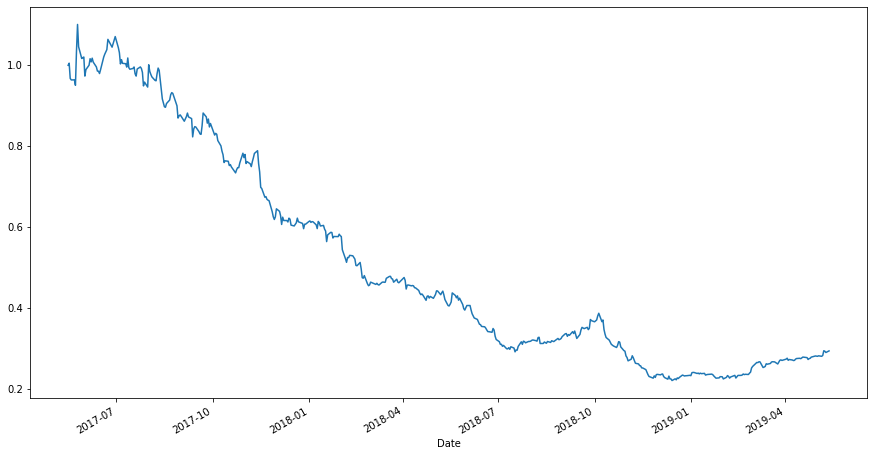

In [42]:
plt.figure(figsize = (15,8))
cumulative_returns = ( 1 + (data_Voltas['Close Price'].pct_change() * data_Voltas['Action']) ).dropna().cumprod()
cumulative_returns.plot()